In [1]:
# importing the Dependancies
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the pre-trained cascade classifier for frontal face detection
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')

# Load the pre-trained cascade classifier for eye detection (optional)
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')

In [3]:
# Read the Image using cv2 from folder
img = cv2.imread('Dataset/Robert_Downey_Jr/040_91c31d91.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

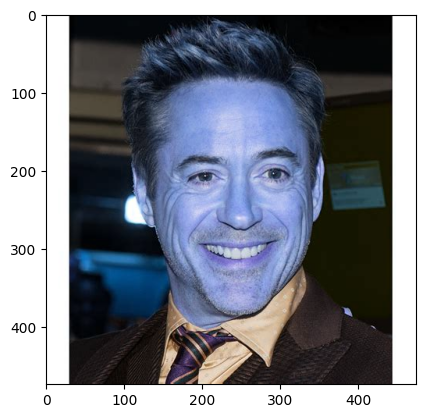

In [4]:
plt.imshow(img)

In [5]:
faces = face_cascade.detectMultiScale(img,1.3,5)

In [6]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

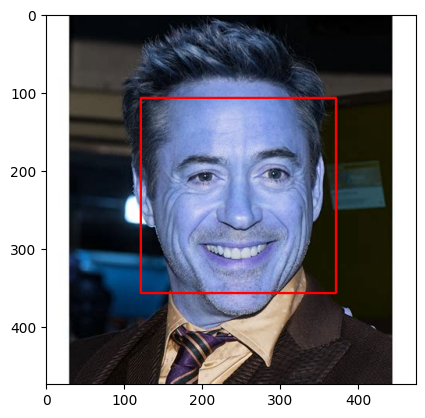

In [7]:
plt.imshow(face_img)

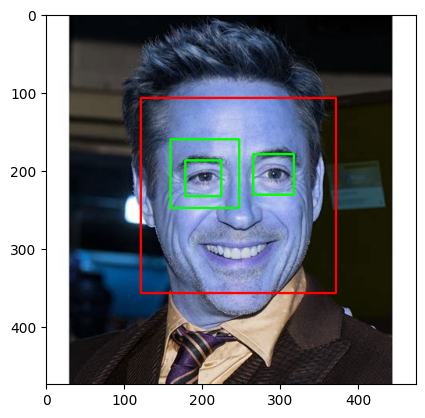

In [8]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(img)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.imshow(face_img)

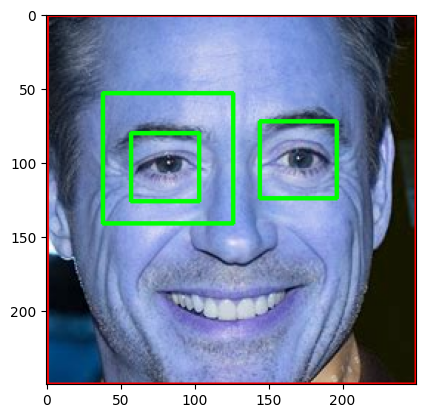

In [9]:
plt.imshow(roi_color)

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        if len(eyes) >= 2:
            return roi_color
    return None


In [11]:
crop_img = get_cropped_image_if_2_eyes('Dataset/Robert_Downey_Jr/040_91c31d91.jpg')

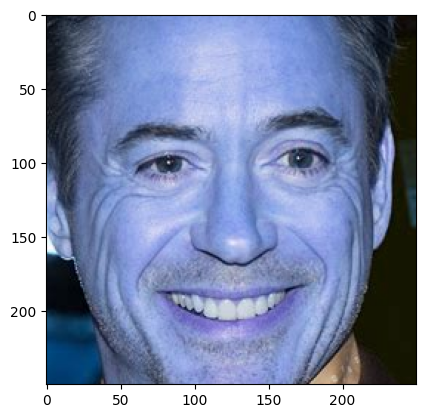

In [12]:
plt.imshow(crop_img)

In [13]:
path_to_data = './Dataset/'
path_to_cr_data = './Dataset/cropped/'

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./Dataset/.ipynb_checkpoints',
 './Dataset/Angelina_Jolie',
 './Dataset/Brad_Pitt',
 './Dataset/cropped',
 './Dataset/Denzel_Washington',
 './Dataset/Leonardo_DiCaprio',
 './Dataset/Robert_Downey_Jr']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)   # If folder exist then remove it
os.mkdir(path_to_cr_data)

In [17]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    count = 1
    print(celebrity_name)
    
    if celebrity_name not in celebrity_file_name_dict:
        celebrity_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file():
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)
                
                cropped_file_name = celebrity_name + str(count) + ".jpg"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
                count += 1

.ipynb_checkpoints
Angelina_Jolie
Generating cropped images in folder:  ./Dataset/cropped/Angelina_Jolie
Brad_Pitt
Generating cropped images in folder:  ./Dataset/cropped/Brad_Pitt
cropped
Denzel_Washington
Generating cropped images in folder:  ./Dataset/cropped/Denzel_Washington
Leonardo_DiCaprio
Generating cropped images in folder:  ./Dataset/cropped/Leonardo_DiCaprio
Robert_Downey_Jr
Generating cropped images in folder:  ./Dataset/cropped/Robert_Downey_Jr


In [18]:
celebrity_file_name_dict

{'.ipynb_checkpoints': [],
 'Angelina_Jolie': ['./Dataset/cropped/Angelina_Jolie\\Angelina_Jolie1.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie2.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie3.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie4.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie5.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie6.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie7.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie8.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie9.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie10.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie11.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie12.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie13.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie14.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie15.jpg',
  './Dataset/cropped/Angelina_Jolie\\Angelina_Jolie16.jpg',
  '.

In [19]:
class_dict = {}
count=0
for celebrity_name in celebrity_file_name_dict.keys():
    if(celebrity_name=='cropped'):
        continue
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'.ipynb_checkpoints': 0,
 'Angelina_Jolie': 1,
 'Brad_Pitt': 2,
 'Denzel_Washington': 3,
 'Leonardo_DiCaprio': 4,
 'Robert_Downey_Jr': 5}

In [20]:
X = []
Y = []

for celebrity_name, training_files in celebrity_file_name_dict.items():
    if len(training_files)==0:
        continue
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img,(32,32))
        X.append(scalled_raw_img)
        Y.append(class_dict[celebrity_name])

In [21]:
len(X)

264

In [22]:
len(Y)

264

In [23]:
X[0]

array([[[249, 228, 226],
        [252, 232, 227],
        [237, 212, 210],
        ...,
        [ 39,  54,  70],
        [ 27,  33,  53],
        [ 67,  80, 106]],

       [[250, 229, 227],
        [254, 230, 228],
        [175, 157, 166],
        ...,
        [ 36,  37,  51],
        [ 47,  54,  72],
        [ 22,  30,  53]],

       [[250, 229, 228],
        [245, 221, 222],
        [  7,   1,  15],
        ...,
        [ 31,  34,  45],
        [ 31,  33,  44],
        [ 21,  25,  43]],

       ...,

       [[157, 146, 160],
        [233, 212, 214],
        [227, 204, 213],
        ...,
        [ 38,  53,  80],
        [ 43,  55,  79],
        [ 19,  31,  59]],

       [[139, 126, 142],
        [218, 196, 202],
        [219, 190, 199],
        ...,
        [ 30,  46,  75],
        [ 39,  46,  73],
        [ 12,  20,  44]],

       [[ 82,  69,  85],
        [160, 143, 152],
        [235, 201, 205],
        ...,
        [ 28,  41,  68],
        [ 19,  23,  47],
        [  5,   8,  23]]

In [24]:
# X = np.array(X).reshape(len(X), 4096, 1).astype(float)
X = np.array(X)
X.shape

(264, 32, 32, 3)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Reshape, Conv2D, Flatten, Dense, Resizing,Dropout, MaxPooling2D

In [28]:

# Number of classes in your dataset
numOfClasses = 5

# Define the input shape
input_shape = (32,32,3)

# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

model = tf.keras.Sequential([
    InputLayer(input_shape=input_shape),  # Specify the input shape
    Resizing(224, 224),  # Resize input to match the pre-trained model's expected size
    base_model,
    Flatten(),
    Dense(numOfClasses, activation='softmax')  # Add the Dense layer with appropriate activation
])

# model = Sequential([
#     InputLayer(input_shape=input_shape),  
#     Reshape((64, 64, 1)),  
#     Conv2D(3, (3, 3), padding='same', activation='relu'),  
    
#     Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
#     MaxPooling2D((2,2)),
#     # drop

#     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     MaxPooling2D((2,2)),

#     Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     MaxPooling2D((2,2)),

#     # Dense
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(5, activation='softmax') # Add the Dense layer with appropriate activation
# ])

C:\Users\GAURAV PRAJAPATI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
# Compiling the model using adam optimizers
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         313,605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,571,589 (9.81 MB)

 Trainable params: 2,537,477 (9.68 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [30]:
# Ensure train_X, train_Y, test_X, and test_Y are numpy arrays with correct dtype
train_X = np.array(train_X, dtype=np.float32)
train_Y = np.array(train_Y, dtype=np.int32)
test_X = np.array(test_X, dtype=np.float32)
test_Y = np.array(test_Y, dtype=np.int32)

train_Y = np.clip(train_Y, 0, numOfClasses - 1)
test_Y = np.clip(test_Y, 0, numOfClasses - 1)

# Normalize the data
train_X = train_X/255.0
test_X = test_X/255.0

# Check the shapes of the data
print(f"train_X shape: {train_X.shape}")
print(f"train_Y shape: {train_Y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_Y shape: {test_Y.shape}")

train_X shape: (211, 32, 32, 3)
train_Y shape: (211,)
test_X shape: (53, 32, 32, 3)
test_Y shape: (53,)


In [31]:
# Fit the model
model.fit(train_X, train_Y, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4089 - loss: 4.9155
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8861 - loss: 0.5677
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9186 - loss: 0.3142
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9371 - loss: 0.2066
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9857 - loss: 0.0336
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9827 - loss: 0.1148
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9315 - loss: 0.3155
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9576 - loss: 0.1703
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9871 - loss: 0.0389
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9752 - loss: 0.0892


In [32]:
# Evaluate the model
model.evaluate(test_X, test_Y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.4538 - loss: 12.0882


[13.622651100158691, 0.4150943458080292]